# Gradient Boosting Analysis on Digits Dataset


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Load and inspect the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target
print("Shape of data (samples, features):", X.shape)
print("Target classes:", np.unique(y))
print("First 5 target labels:", y[:5])

Shape of data (samples, features): (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]
First 5 target labels: [0 1 2 3 4]


In [3]:
# Convert to DataFrame for basic exploration
df_digits = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df_digits['target'] = y
print("\nSummary statistics:")
print(df_digits.describe())


Summary statistics:
       pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.303840     5.204786    11.835838    11.848080   
std        0.0     0.907192     4.754826     4.248842     4.287388   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     4.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000    15.000000    15.000000   
max        0.0     8.000000    16.000000    16.000000    16.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000 

In [4]:
# Standardize the features for consistent scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# Train Gradient Boosting models with different hyperparameters
learning_rates = [0.01, 0.05, 0.1, 0.2]
n_estimators = [50, 100, 200, 300]

# Store results for plotting
results = []

# Loop through all combinations
for lr in learning_rates:
    for n in n_estimators:
        # Create and train the model
        model = GradientBoostingClassifier(learning_rate=lr, n_estimators=n, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on both train and test data
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
        # Calculate accuracies
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)
        
        # Save the results
        results.append({
            'learning_rate': lr,
            'n_estimators': n,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        })

In [11]:
# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results

,learning_rate,n_estimators,train_accuracy,test_accuracy
0,0.01,50,0.923452,0.883333
1,0.01,100,0.956159,0.927778
2,0.01,200,0.987474,0.936111
3,0.01,300,0.998608,0.941667
4,0.05,50,0.997912,0.947222
5,0.05,100,1.000000,0.958333
6,0.05,200,1.000000,0.969444
7,0.05,300,1.000000,0.966667
8,0.10,50,1.000000,0.958333
9,0.10,100,1.000000,0.969444


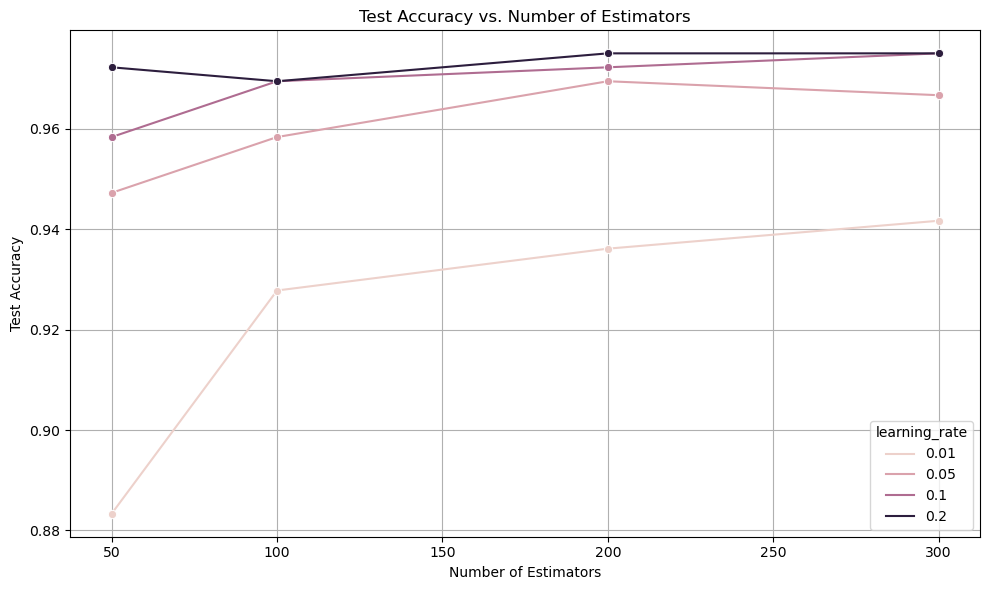

In [12]:
# Visualize the test accuracy across different hyperparameter settings
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='n_estimators', y='test_accuracy', hue='learning_rate', marker='o')
plt.title('Test Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()